In [ ]:
#@title Mount Drive
from google.colab import drive
drive.mount('/content/drive')
!pip3 install numpy
%cd /content/drive/My Drive/'Colab Notebooks'/701Fall21

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/701Fall21


# Recitation 1
## *Using Vectors and Arrays in NumPy*

## Authors
> Eric Liang <esliang@andrew.cmu.edu\> <br>
> Joseph Konan <jkonan@andrew.cmu.edu\> <br>
> Modified by 10701 Course Staff

## Reference
> Kelly, Piares A. "[7.1 Vectors, Tensors and the Index Notation.](http://homepages.engineering.auckland.ac.nz/~pkel015/SolidMechanicsBooks/Part_II/07_3DElasticity/07_3DElasticity_01_3D_Index.pdf)" In Solid Mechanics Part II: Engineering Solid Mechanics, 189-200. 2012.

> A nice cheat sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf 

## Command Line, File I/O, and Google Colab Tutorial
> https://docs.google.com/document/d/1RSGvlBG8dDfs62_0jJEHnQFN-Au6yFbp8M6QTNs3EIY/edit?usp=sharing

## Table of Contents
1. Setting-up NumPy
2. Loading TSV Files
3. Slicing and Indexing Arrays
4. Vectors vs Arrays
5. Useful Numpy Functions
6. Useful Plot Functions

## 1. Setting-up NumPy
### Installing NumPy
To install NumPy using pip:
> `pip install numpy`

To upgrade NumPy using pip:
> `pip install numpy --upgrade`

To see current version of NumPy:
> `pip show numpy`

Alternative methods can be found here:

> https://scipy.org/install.html

### Importing NumPy
We import NumPy similar to how to import any other python library.

In [ ]:
import numpy as np
np.random.seed(0)

np.version.version

'1.19.5'

##2. Loading TSV Files
There are many ways to load a TSV (or any delimited) file. The 2 easiest ways are:
1. csv and open
2. np.genfromtxt()


In [ ]:
f = "small_train.tsv"

In [ ]:
import csv
with open(f) as tsv_file:
    tsv_reader = csv.reader(tsv_file, delimiter="\t")
    title = np.array(next(tsv_reader))
    data = np.array([r for r in tsv_reader])
title

array(['Anti_satellite_test_ban', 'Export_south_africa', ' Party '],
      dtype='<U23')

In [ ]:
data_2 = np.genfromtxt(f, delimiter="\t", dtype=None, encoding=None)
title_2 = data_2[0,]
data_2 = data_2[1:,]

In [ ]:
print("Does data equal data_2? ", np.array_equal(data, data_2))
print(title_2)
print(data_2)

Does data equal data_2?  True
['Anti_satellite_test_ban' 'Export_south_africa' ' Party']
[['n' 'y' 'democrat']
 ['n' 'y' 'republican']
 ['y' 'y' 'democrat']
 ['y' 'y' 'democrat']
 ['y' 'y' 'democrat']
 ['y' 'y' 'democrat']
 ['y' 'y' 'democrat']
 ['n' 'y' 'republican']
 ['y' 'y' 'democrat']
 ['n' 'n' 'republican']
 ['y' 'y' 'democrat']
 ['n' 'y' 'republican']
 ['y' 'y' 'democrat']
 ['n' 'n' 'republican']
 ['n' 'y' 'republican']
 ['n' 'n' 'republican']
 ['y' 'y' 'democrat']
 ['y' 'y' 'democrat']
 ['y' 'y' 'democrat']
 ['y' 'y' 'democrat']
 ['n' 'y' 'democrat']
 ['y' 'y' 'democrat']
 ['y' 'n' 'republican']
 ['n' 'n' 'republican']
 ['n' 'y' 'republican']
 ['n' 'y' 'republican']
 ['n' 'y' 'republican']
 ['n' 'n' 'republican']]


##3. Slicing and Indexing Arrays
Rows and columns of an array can be selected in the form
> `array[r,c]`

Where the `r` is the row index and `c` is the column index

$
\left[\begin{array}{cc} 
[1 & 2 & 3] \\
[4 & 5 & 6] \\
[7 & 8 & 9]
\end{array}\right]
$

In [ ]:
data = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("1st row, 1st col: ", data[0, 0])

1st row, 1st col:  1


If you want to capture multiple consecutive rows/cols at once, use `x:y`. It means "from x (included) until y (not included)". First and last indices can be left blank

In [ ]:
print("Row 0: ", data[0,:])
print("Col 0: ", data[:,0])

Row 0:  [1 2 3]
Col 0:  [1 4 7]


In [ ]:
print("Top Row: ", data[:1,:])
print("Bottom Row: ", data[2:,:])

Top Row:  [[1 2 3]]
Bottom Row:  [[7 8 9]]


You can also take non-consecutive sections, using index lists

In [ ]:
print("Rows 0,2: ")
print(data[[0,2],:])

Rows 0,2: 
[[1 2 3]
 [7 8 9]]


In order to find the size of your array, use the `.shape` feature. It returns a list of the number of rows and columns

In [ ]:
print(data.shape)
print("Number of rows: ", data.shape[0])
print("Number of cols: ", data.shape[1])

(3, 3)
Number of rows:  3
Number of cols:  3


##4. Vectors vs Arrays
Numpy vectors differ from arrays in that they are 1D. Certain differences in indexing may cause an issue

In [ ]:
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10,11,12],
              [13,14,15,16]]
             )
y = x[0,:]
y2 = y.reshape([1, y.shape[0]])

print(x)
print()
print(y)
print()
print(y2)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

[1 2 3 4]

[[1 2 3 4]]


Notice that vectors and arrays have different dimensions

In [ ]:
print(y.shape)
print(y2.shape)

(4,)
(1, 4)


Vectors also cannot be transposed

In [ ]:
print(y.transpose())
print(y2.transpose())

[1 2 3 4]
[[1]
 [2]
 [3]
 [4]]


##5. Useful Numpy Functions
There are many common functions that we believe will be very useful throughout your assignments. They're organized into type below:

###Initializations
1. Identity Matrix

In [ ]:
i4 = np.eye(4)
print(i4)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


2. Matrix of 0s or 1s

In [ ]:
zeros = np.zeros([2,3])
ones = np.ones([2,3])

print(zeros)
print(ones)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


3. Random Initializations with np.random (more documentation at: https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html)

In [ ]:
#Random number between 0 and 1
random = np.random.random((2,3))
print(random)

[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]]


In [ ]:
#Random decimal between given range (inclusive low, exclusive high)
uniform = np.random.uniform(low=-0.1, high=0.1, size=(2,3))
print(uniform)

[[ 0.01360891  0.08511933 -0.08579279]
 [-0.08257414 -0.09595632  0.06652397]]


In [ ]:
#Random integer between given range
integer = np.random.randint(low=-20, high=20, size=(2,3))
print(integer)

[[ -5 -20  -2]
 [ 15   4   9]]


### Shape Manipulation

1. Getting array shape with .shape, len(), and .size

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

In [ ]:
print("Array Dimension: ", x.shape)
print("Number of Rows: ", len(x))
print("Number of Elements: ", x.size)

Array Dimension:  (2, 2)
Number of Rows:  2
Number of Elements:  4


2. Transpose

In [ ]:
print(x)

[[1 2]
 [3 4]]


In [ ]:
print(x.T)

[[1 3]
 [2 4]]


3. Reshaping arrays

In [ ]:
print(x.reshape([1,4]))

[[1 2 3 4]]


In [ ]:
print(y.reshape([4,1]))

[[5]
 [6]
 [7]
 [8]]


3. Appending arrays with vstack/hstack

$
\left[\begin{array}{cc} 
[1 & 2] \\
[3 & 4]
\end{array}\right]
hstack
\left[\begin{array}{cc} 
[5 & 6] \\
[7 & 8]
\end{array}\right]
=
\left[\begin{array}{cc}
[1 & 2 & 5 & 6] \\
[3 & 4 & 7 & 8]
\end{array}\right]
$

In [ ]:
h_stack = np.hstack([x, y])
print(h_stack)
print()

v_stack = np.vstack([x, y])
print(v_stack)

[[1 2 5 6]
 [3 4 7 8]]

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


### Matrix Operations

1. Addition

$
\left(\begin{array}{cc} 
1 & 2 \\
3 & 4
\end{array}\right)
+
\left(\begin{array}{cc} 
5 & 6 \\
7 & 8
\end{array}\right)
=
\left(\begin{array}{cc} 
6 & 8 \\
10 & 12
\end{array}\right)
$

In [ ]:
add_v1 = np.add(x, y)
add_v2 = x + y
print("Are both the same? ",np.array_equal(add_v1, add_v2))
print(add_v1)
print()

# Watch out for the difference between this and non-numpy array
a = [1,2,3]
b = [4,5,6]
print(a + b)

Are both the same?  True
[[ 6  8]
 [10 12]]

[1, 2, 3, 4, 5, 6]


2. Subtraction

$
\left(\begin{array}{cc} 
5 & 6 \\
7 & 8
\end{array}\right)
-
\left(\begin{array}{cc} 
1 & 2 \\
3 & 4
\end{array}\right)
=
\left(\begin{array}{cc} 
4 & 4 \\
4 & 4
\end{array}\right)
$

In [ ]:
sub_v1 = np.subtract(y,x)
sub_v2 = y - x
print("Are both the same? ",np.array_equal(sub_v1, sub_v2))
print(sub_v1)

Are both the same?  True
[[4 4]
 [4 4]]


3. Multiplying by a Constant

$
4 *
\left(\begin{array}{cc} 
1 & 2 \\
3 & 4
\end{array}\right)
=
\left(\begin{array}{cc} 
4 & 8 \\
12 & 16
\end{array}\right)
$

In [ ]:
c = 4
print(c * x)

[[ 4  8]
 [12 16]]


4. Matrix Multiplication

$
\left(\begin{array}{cc} 
1 & 2 \\
3 & 4
\end{array}\right)
\cdot
\left(\begin{array}{cc} 
5 & 6 \\
7 & 8
\end{array}\right)
=
\left(\begin{array}{cc} 
19 & 22 \\
43 & 50
\end{array}\right)
$

In [ ]:
mult_v1 = np.dot(x, y)
mult_v2 = np.matmul(x, y)
print("Are both the same? ", np.array_equal(mult_v1, mult_v2))
print(mult_v1)

Are both the same?  True
[[19 22]
 [43 50]]


5. Elementwise multiplication

$
\left(\begin{array}{cc} 
1 & 2 \\
3 & 4
\end{array}\right)
\times
\left(\begin{array}{cc} 
5 & 6 \\
7 & 8
\end{array}\right)
=
\left(\begin{array}{cc} 
5 & 12 \\
21 & 32
\end{array}\right)
$

In [ ]:
elem_mult = x * y
elem_mult_2 = np.multiply(x,y)
print("Are both the same? ", np.array_equal(elem_mult, elem_mult_2))
print(elem_mult)

Are both the same?  True
[[ 5 12]
 [21 32]]


### Math Operations

1. Exponential and natural log

In [ ]:
print(np.exp(x))

print("exp(1) = ", np.exp(1))
print("exp(2) = ", np.exp(2))
print("exp(3) = ", np.exp(3))
print("exp(4) = ", np.exp(4))

[[ 2.71828183  7.3890561 ]
 [20.08553692 54.59815003]]
exp(1) =  2.718281828459045
exp(2) =  7.38905609893065
exp(3) =  20.085536923187668
exp(4) =  54.598150033144236


In [ ]:
print(np.log(x))

print("log(1) = ", np.log(1))
print("log(2) = ", np.log(2))
print("log(3) = ", np.log(3))
print("log(4) = ", np.log(4))

[[0.         0.69314718]
 [1.09861229 1.38629436]]
log(1) =  0.0
log(2) =  0.6931471805599453
log(3) =  1.0986122886681098
log(4) =  1.3862943611198906


2. Min/Max, Argmin/Argmax, maximum/minimum

In [ ]:
wide_df = np.hstack([x,y])
print(wide_df)
print("Max of first row is: ", np.max(wide_df[0,:]))
print("It is in column: ", np.argmax(wide_df[0,:]))

[[1 2 5 6]
 [3 4 7 8]]
Max of first row is:  6
It is in column:  3


In [ ]:
long_df = np.vstack([x,y])
print(long_df)
print("Min of 2nd col is: ", np.min(long_df[:,1]))
print("It is in row: ", np.argmin(long_df[:,1]))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
Min of 2nd col is:  2
It is in row:  0


In [ ]:
a = np.array([2,4,5])
b = np.array([3,1,6])
print("Element wise maximum of a and b is: ", np.maximum(a, b))
print("Element wise minimum of a and b is: ", np.minimum(a, b))

Element wise maximum of a and b is:  [3 4 6]
Element wise minimum of a and b is:  [2 1 5]


##6. Useful Plot Functions

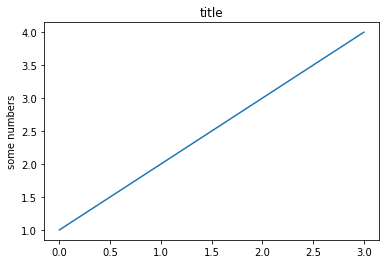

In [ ]:
import matplotlib.pyplot as plt

# Notice y axis is elements, x axis is index
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.title('title')
plt.show()

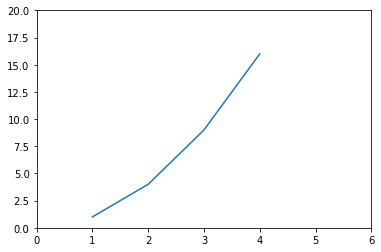

In [ ]:
# Give two arguments and it will treat as x,y coordinates
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
# Specify axis bounds
plt.axis([0, 6, 0, 20])
plt.show()

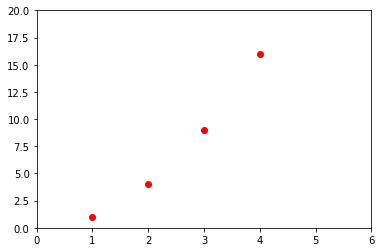

In [ ]:
# Scatter plot
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

In [ ]:
# Plot two lines
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], color = "blue")
plt.plot([1, 2, 3, 4], [7, 6, 12, 9], color = "red")
plt.axis([0, 6, 0, 20])
plt.show()